<a href="https://colab.research.google.com/github/guelpman/Priorizacion_Descuentos_Peru/blob/main/AnalisisDescriptivoRetoPeru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#Permite ver todas las columnas
pd.options.display.max_columns = None
pd.options.display.max_rows=None

In [7]:
Filenames={'clients_attributes.csv','executed_promos.csv'}

In [11]:
for i in filenames:
  print(str(i))
  urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
  filename = str(i)
  fullpath = os.path.join(urlpath, filename)
  str(i)= pd.read_csv(fullpath)
 ### print(df_str(i).head(3))


SyntaxError: ignored

In [45]:
### Importamos los data set clients_attributes
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "clients_attributes.csv"
fullpath = os.path.join(urlpath, filename)
df_clients= pd.read_csv(fullpath)
df_clients.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [46]:
### Importamos los data set --- 
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "executed_promos.csv"
fullpath = os.path.join(urlpath, filename)
df_Expromos= pd.read_csv(fullpath)
df_Expromos.head()

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16


In [26]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "active_promos.csv"
fullpath = os.path.join(urlpath, filename)
df_actpromos= pd.read_csv(fullpath)
df_actpromos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [27]:
Fechas1=['Fecha_Desde','Fecha_Hasta']

In [28]:
for c in Fechas1:
    print(str(c))
    df_actpromos[str(c)] = pd.to_datetime(df_actpromos[str(c)])
    df_actpromos[str(c)+'_year'] = df_actpromos[str(c)].dt.year 
    df_actpromos[str(c)+'_month'] = df_actpromos[str(c)].dt.month
    df_actpromos[str(c)+'_day'] = df_actpromos[str(c)].dt.day 

Fecha_Desde
Fecha_Hasta


In [29]:
df_actpromos.groupby(['Fecha_Desde_year','Fecha_Desde_month'])['CodigoDC'].count()

Fecha_Desde_year  Fecha_Desde_month
2018              8                     2735
                  9                    79630
                  10                   69134
                  11                   89347
                  12                    3238
2019              1                    50522
                  2                     1551
                  3                    34723
                  4                     2633
                  5                     4656
                  6                     2425
                  7                    13819
                  8                    31463
                  9                    36561
Name: CodigoDC, dtype: int64

In [30]:
len(df_actpromos)

422437

In [47]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/IrisMon/Priorizacion_Descuentos_Peru/main/"
filename = "sales.csv"
fullpath = os.path.join(urlpath, filename)
df_sales= pd.read_csv(fullpath,encoding='ISO-8859-1')
df_sales.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0


In [48]:
df_sales[df_sales['Año']>=2019].Mes.max()

8

In [49]:
### Importamos los data set active_promos
urlpath = "https://raw.githubusercontent.com/brewing-datacup/reto-peru-2020/main/data/"
filename = "test.csv"
fullpath = os.path.join(urlpath, filename)
test= pd.read_csv(fullpath,sep=',')
print(str(len(test)))
test.head()

16870


,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [35]:
urlpath = "https://raw.githubusercontent.com/guelpman/Priorizacion_Descuentos_Peru/main/"
filename = "Promos_Cliente_6.txt"
fullpath = os.path.join(urlpath,filename)
data=pd.read_csv(fullpath,sep='\t', encoding='ISO-8859-1')
data.head(4)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cosecha,Cliente,Marca,Cupo,Total_Promociones,Prom_Duracion_dd,Total_Duracion_dd,Maxima_Duracion_dd,Minima_Duracion_dd,MinFecha_Desde,MaxFecha_Desde,Total_Promo_Ejecutadas,Prom_Duracion_Ejecutadas_dd,Total_Duracion_Ejecutadas_dd,Maxima_Duracion_Ejecutadas_dd,Minima_Duracion_Ejecutadas_dd,MinFecha_Ejecutadas_Desde,MaxFecha_Ejecutadas_Desde,Total_Promociones_Prev,Prom_Duracion_dd_Prev,Total_Duracion_dd_Prev,Maxima_Duracion_dd_Prev,Minima_Duracion_dd_Prev,MinFecha_Desde_Prev,MaxFecha_Desde_Prev,Total_Promo_Ejecutadas_Prev,Prom_Duracion_Ejecutadas_dd_Prev,Total_Duracion_Ejecutadas_dd_Prev,Maxima_Duracion_Ejecutadas_dd_Prev,Minima_Duracion_Ejecutadas_dd_Prev,MinFecha_Ejecutadas_Desde_Prev,MaxFecha_Ejecutadas_Desde_Prev,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroVecesCompra,Total_Net_Revenue,Total_Net_Volumen,Total_Dcto,Max_Net_Revenue,Max_Net_Volumen,Max_Dcto,Min_Net_Revenue,Min_Net_Volumen,Min_Dcto,Total_Net_Revenue_Clase_Envase_1,Total_Net_Volumen_Clase_Envase_1,Total_Net_Dscto_Clase_Envase_1,Total_Net_Revenue_Clase_Envase_2,Total_Net_Volumen_Clase_Envase_2,Total_Net_Dscto_Clase_Envase_2,Total_Net_Revenue_Clase_Envase_3,Total_Net_Volumen_Clase_Envase_3,Total_Net_Dscto_Clase_Envase_3,Total_Net_Revenue_Clase_SegmentoPrecio_1,Total_Net_Volumen_Clase_SegmentoPrecio_1,Total_Net_Dscto_Clase_SegmentoPrecio_1,Total_Net_Revenue_Clase_SegmentoPrecio_2,Total_Net_Volumen_Clase_SegmentoPrecio_2,Total_Net_Dscto_Clase_SegmentoPrecio_2,Total_Net_Revenue_Clase_SegmentoPrecio_3,Total_Net_Volumen_Clase_SegmentoPrecio_3,Total_Net_Dscto_Clase_SegmentoPrecio_3,Total_Net_Revenue_Clase_SegmentoPrecio_4,Total_Net_Volumen_Clase_SegmentoPrecio_4,Total_Net_Dscto_Clase_SegmentoPrecio_4,UltimoAñoMesVenta,Ultimo_Total_Net_Revenue,Ultimo_Total_Net_Volumen,Ultimo_Total_Dcto,Ultimo_Total_Net_Revenue_Clase_Envase_1,Ultimo_Total_Net_Volumen_Clase_Envase_1,Ultimo_Total_Net_Dscto_Clase_Envase_1,Ultimo_Total_Net_Revenue_Clase_Envase_2,Ultimo_Total_Net_Volumen_Clase_Envase_2,Ultimo_Total_Net_Dscto_Clase_Envase_2,Ultimo_Total_Net_Revenue_Clase_Envase_3,Ultimo_Total_Net_Volumen_Clase_Envase_3,Ultimo_Total_Net_Dscto_Clase_Envase_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_4,TARGET
0,201809,1000,40,16,5,6.8,34,10,2,5/09/2018,20/09/2018,3,7.0,22,10,0,7/09/2018,17/09/2018,2,3,5,3,2,13/08/2018,29/08/2018,1,3,3,3,0,13/08/2018,13/08/2018,14/09/2009,5,17,15,1,2,1,3293,8.0,952758.87,3.14,-48227.28,239027.08,0.77,0.0,57297.46,0.18,-23379.73,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201808.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,201809,10008,40,16,4,6.0,24,10,2,5/09/2018,20/09/2018,0,NaN,0,0,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,0,0,0,0,NaN,NaN,11/10/2016,3,8,9,2,2,0,709,7.0,94534.37,0.30,-871.31,19099.15,0.06,0.0,8632.12,0.03,-871.31,0.0,0.0,0.0,94534.37,0.30,-871.31,0.0,0.0,0.0,94534.37,0.30,-871.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201808.0,18993.0,0.0,0.0,0.0,0.0,0.0,18993.0,0.0,0.0,0.0,0.0,0.0,18993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,201809,10011,40,16,4,6.0,24,10,2,5/09/2018,20/09/2018,0,NaN,0,0,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,0,0,0,0,NaN,NaN,11/10/2016,1,4,9,2,3,0,709,4.0,47672.62,0.15,0.00,18992.56,0.06,0.0,9496.28,0.03,0.00,0.0,0.0,0.0,47672.62,0.15,0.00,0.0,0.0,0.0,47672.62,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201808.0,18993.0,0.0,0.0,0.

In [36]:
data.groupby('Cosecha')['Cliente'].count()

Cosecha
201808     2275
201809    19160
201810    21930
201811    24339
201812     2522
201901    18974
201902      407
201903    18494
201904     2628
201905     3748
201906     1686
201907    13776
201908    21981
201909    16870
Name: Cliente, dtype: int64

In [37]:
data.isnull().sum()

Cosecha                                                 0
Cliente                                                 0
Marca                                                   0
Cupo                                                    0
Total_Promociones                                       0
Prom_Duracion_dd                                        0
Total_Duracion_dd                                       0
Maxima_Duracion_dd                                      0
Minima_Duracion_dd                                      0
MinFecha_Desde                                          0
MaxFecha_Desde                                          0
Total_Promo_Ejecutadas                                  0
Prom_Duracion_Ejecutadas_dd                        146705
Total_Duracion_Ejecutadas_dd                            0
Maxima_Duracion_Ejecutadas_dd                           0
Minima_Duracion_Ejecutadas_dd                           0
MinFecha_Ejecutadas_Desde                          146705
MaxFecha_Ejecu

In [38]:
data.groupby('TARGET')['Cliente'].count()/len(data)

TARGET
0    0.869157
1    0.130843
Name: Cliente, dtype: float64

In [40]:
len(data)

168790

In [39]:
data.groupby('Total_Promo_Ejecutadas')['Cliente'].count()/len(data)

Total_Promo_Ejecutadas
0    0.869157
1    0.103116
2    0.022205
3    0.004988
4    0.000498
5    0.000030
6    0.000006
Name: Cliente, dtype: float64

In [41]:
df_actpromos.groupby('Marca')['CodigoDC'].count()

Marca
29     22659
39    193960
40    205818
Name: CodigoDC, dtype: int64

## Analisis Descriptivo
Primero Crearemos un solo data set para comenzar a realizar el analisis descriptivo en busca de inshigt

In [ ]:

print('Numero de registros en Sales data;  '+ str(df_sales.Cliente.count()))
print('Numero de registros en Executed promos data;  '+ str(df_Expromos.CodigoDC.count()))
print('Numero de registros en Client attributes data;  '+ str(df_clients.Cliente.count()))
print('Numero de registros en Active promos data;  '+ str(df_actpromos.CodigoDC.count()))

In [ ]:
df_actpromos.head(3)

In [ ]:
#df_sales['IngresoNeto'] = round(df_sales['Nr'],2).apply(int)
df_sales['IngresoNeto'] = df_sales['Nr']
del df_sales['Nr']

In [ ]:
df_sales[((df_sales['Cliente']==3213) & (df_sales['Mes']==10))].head(3)

In [ ]:
df_actpromos[df_actpromos['Cliente']==3213].head(3)

In [ ]:
df_Expromos[df_Expromos['Cliente']==3213]

In [ ]:
df_sales.head(3)

In [ ]:
df_sales.groupby('ClaseEnvase')['Cliente'].count()

In [ ]:
#Generamos Valores unicos
df_sales.groupby('ClaseEnvase')['Cliente'].nunique()

Como se observa solo 5 clientes han comprado

In [ ]:
pd.crosstab(df_sales['ClaseEnvase'], df_sales['SegmentoPrecio'])

In [ ]:
## Tabla Cruzada
pd.crosstab(df_sales['Cupo'], df_sales['Marca'])

In [ ]:
df_sales.groupby(['Año','Mes'])['IngresoNeto'].mean()

In [ ]:
df_sales.describe().transpose()

In [ ]:
df_clients.isna().sum()

In [ ]:
df_Expromos.isna().sum()

In [ ]:
df_sales.describe()

## Primer model 
Generamos la primera version del modelo 


In [38]:
result = pd.concat([test, data], axis=1, sort=False)
result = pd.merge(test, data, how='left', on=['Cliente', 'Marca','Cupo'])

In [39]:
result.head(3)

,Cliente,Marca,Cupo,Ejecuto_Promo,Total_Promociones,Prom_Duracion_dd,Total_Duracion_dd,Maxima_Duracion_dd,Minima_Duracion_dd,MinFecha_Desde,MaxFecha_Desde,Total_Promo_Ejecutadas,Prom_Duracion_Ejecutadas_dd,Total_Duracion_Ejecutadas_dd,Maxima_Duracion_Ejecutadas_dd,Minima_Duracion_Ejecutadas_dd,MinFecha_Ejecutadas_Desde,MaxFecha_Ejecutadas_Desde,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_EmpezoPromo_dd,Total_Net_Revenue,Total_Net_Volumen,Total_Dcto,Max_Net_Revenue,Max_Net_Volumen,Max_Dcto,Min_Net_Revenue,Min_Net_Volumen,Min_Dcto,Total_Net_Revenue_Clase_Envase_1,Total_Net_Volumen_Clase_Envase_1,Total_Net_Dscto_Clase_Envase_1,Total_Net_Revenue_Clase_Envase_2,Total_Net_Volumen_Clase_Envase_2,...,Total_Net_Revenue_Clase_Envase_3,Total_Net_Volumen_Clase_Envase_3,Total_Net_Dscto_Clase_Envase_3,Total_Net_Revenue_Clase_SegmentoPrecio_1,Total_Net_Volumen_Clase_SegmentoPrecio_1,Total_Net_Dscto_Clase_SegmentoPrecio_1,Total_Net_Revenue_Clase_SegmentoPrecio_2,Total_Net_Volumen_Clase_SegmentoPrecio_2,Total_Net_Dscto_Clase_SegmentoPrecio_2,Total_Net_Revenue_Clase_SegmentoPrecio_3,Total_Net_Volumen_Clase_SegmentoPrecio_3,Total_Net_Dscto_Clase_SegmentoPrecio_3,Total_Net_Revenue_Clase_SegmentoPrecio_4,Total_Net_Volumen_Clase_SegmentoPrecio_4,Total_Net_Dscto_Clase_SegmentoPrecio_4,UltimoAñoMesVenta,Ultimo_Total_Net_Revenue,Ultimo_Total_Net_Volumen,Ultimo_Total_Dcto,Ultimo_Total_Net_Revenue_Clase_Envase_1,Ultimo_Total_Net_Volumen_Clase_Envase_1,Ultimo_Total_Net_Dscto_Clase_Envase_1,Ultimo_Total_Net_Revenue_Clase_Envase_2,Ultimo_Total_Net_Volumen_Clase_Envase_2,Ultimo_Total_Net_Dscto_Clase_Envase_2,Ultimo_Total_Net_Revenue_Clase_Envase_3,Ultimo_Total_Net_Volumen_Clase_Envase_3,Ultimo_Total_Net_Dscto_Clase_Envase_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_4
0,10,40,16,NaN,19.0,15.8947,302.0,160.0,0.0,5/09/2018,26/08/2019,2.0,86.0,173.0,160.0,0.0,6/05/2019,7/08/2019,3/03/2009,4.0,21.0,15.0,2.0,2.0,0.0,3473.0,76475.72,0.36,-38501.64,45181.63,0.21,-6253.02,12909.04,0.06,-21885.57,0.0,0.00,0.00,76475.72,0.36,...,0.0,0.0,0.0,76475.72,0.36,-38501.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,201908.0,18385.0,0.0,-10363.0,0.0,0.0,0.0,18385.0,0.0,-10363.0,0.0,0.0,0.0,18385.0,0.0,-10363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,29,9,NaN,3.0,7.0000,21.0,11.0,3.0,13/04/2019,18/08/2019,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3/03/2009,4.0,21.0,15.0,2.0,5.0,1.0,3693.0,528982.70,0.78,-36879.24,138715.43,0.21,0.00,22183.29,0.03,-16652.52,528982.7,0.78,-36879.24,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,528982.7,0.78,-36879.24,201908.0,72811.0,0.0,-4855.0,72811.0,0.0,-4855.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72811.0,0.0,-4855.0
2,37,29,9,NaN,1.0,7.0000,7.0,7.0,7.0,18/08/2019,18/08/2019,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3/03/2009,4.0,21.0,16.0,2.0,3.0,1.0,3820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
fecha_columnas=['MinFecha_Desde','MaxFecha_Desde','FechaAltaCliente','MinFecha_Ejecutadas_Desde','MaxFecha_Ejecutadas_Desde','MinFecha_Desde_Prev','MaxFecha_Desde_Prev',
                'MaxFecha_Ejecutadas_Desde_Prev','MinFecha_Ejecutadas_Desde_Prev']

In [54]:
###Damos Formato de fecha para poder generar otras variables
for c in fecha_columnas:
    print(str(c))
    data[str(c)] = pd.to_datetime(data[str(c)])
    data[str(c)+'_year'] = data[str(c)].dt.year 
    data[str(c)+'_month'] = data[str(c)].dt.month
    data[str(c)+'_day'] = data[str(c)].dt.day  

MinFecha_Desde
MaxFecha_Desde
FechaAltaCliente
MinFecha_Ejecutadas_Desde
MaxFecha_Ejecutadas_Desde
MinFecha_Desde_Prev
MaxFecha_Desde_Prev
MaxFecha_Ejecutadas_Desde_Prev
MinFecha_Ejecutadas_Desde_Prev


In [56]:
##Reemplazar nulos
data = data.fillna(0)

In [57]:
data.head(3)

,Cosecha,Cliente,Marca,Cupo,Total_Promociones,Prom_Duracion_dd,Total_Duracion_dd,Maxima_Duracion_dd,Minima_Duracion_dd,MinFecha_Desde,MaxFecha_Desde,Total_Promo_Ejecutadas,Prom_Duracion_Ejecutadas_dd,Total_Duracion_Ejecutadas_dd,Maxima_Duracion_Ejecutadas_dd,Minima_Duracion_Ejecutadas_dd,MinFecha_Ejecutadas_Desde,MaxFecha_Ejecutadas_Desde,Total_Promociones_Prev,Prom_Duracion_dd_Prev,Total_Duracion_dd_Prev,Maxima_Duracion_dd_Prev,Minima_Duracion_dd_Prev,MinFecha_Desde_Prev,MaxFecha_Desde_Prev,Total_Promo_Ejecutadas_Prev,Prom_Duracion_Ejecutadas_dd_Prev,Total_Duracion_Ejecutadas_dd_Prev,Maxima_Duracion_Ejecutadas_dd_Prev,Minima_Duracion_Ejecutadas_dd_Prev,MinFecha_Ejecutadas_Desde_Prev,MaxFecha_Ejecutadas_Desde_Prev,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroVecesCompra,Total_Net_Revenue,Total_Net_Volumen,Total_Dcto,Max_Net_Revenue,Max_Net_Volumen,Max_Dcto,Min_Net_Revenue,Min_Net_Volumen,Min_Dcto,Total_Net_Revenue_Clase_Envase_1,Total_Net_Volumen_Clase_Envase_1,Total_Net_Dscto_Clase_Envase_1,Total_Net_Revenue_Clase_Envase_2,Total_Net_Volumen_Clase_Envase_2,Total_Net_Dscto_Clase_Envase_2,Total_Net_Revenue_Clase_Envase_3,Total_Net_Volumen_Clase_Envase_3,Total_Net_Dscto_Clase_Envase_3,Total_Net_Revenue_Clase_SegmentoPrecio_1,Total_Net_Volumen_Clase_SegmentoPrecio_1,Total_Net_Dscto_Clase_SegmentoPrecio_1,Total_Net_Revenue_Clase_SegmentoPrecio_2,Total_Net_Volumen_Clase_SegmentoPrecio_2,Total_Net_Dscto_Clase_SegmentoPrecio_2,Total_Net_Revenue_Clase_SegmentoPrecio_3,Total_Net_Volumen_Clase_SegmentoPrecio_3,Total_Net_Dscto_Clase_SegmentoPrecio_3,Total_Net_Revenue_Clase_SegmentoPrecio_4,Total_Net_Volumen_Clase_SegmentoPrecio_4,Total_Net_Dscto_Clase_SegmentoPrecio_4,UltimoAñoMesVenta,Ultimo_Total_Net_Revenue,Ultimo_Total_Net_Volumen,Ultimo_Total_Dcto,Ultimo_Total_Net_Revenue_Clase_Envase_1,Ultimo_Total_Net_Volumen_Clase_Envase_1,Ultimo_Total_Net_Dscto_Clase_Envase_1,Ultimo_Total_Net_Revenue_Clase_Envase_2,Ultimo_Total_Net_Volumen_Clase_Envase_2,Ultimo_Total_Net_Dscto_Clase_Envase_2,Ultimo_Total_Net_Revenue_Clase_Envase_3,Ultimo_Total_Net_Volumen_Clase_Envase_3,Ultimo_Total_Net_Dscto_Clase_Envase_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_4,TARGET,MinFecha_Desde_year,MinFecha_Desde_month,MinFecha_Desde_day,MaxFecha_Desde_year,MaxFecha_Desde_month,MaxFecha_Desde_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day,MinFecha_Ejecutadas_Desde_year,MinFecha_Ejecutadas_Desde_month,MinFecha_Ejecutadas_Desde_day,MaxFecha_Ejecutadas_Desde_year,MaxFecha_Ejecutadas_Desde_month,MaxFecha_Ejecutadas_Desde_day,MinFecha_Desde_Prev_year,MinFecha_Desde_Prev_month,MinFecha_Desde_Prev_day,MaxFecha_Desde_Prev_year,MaxFecha_Desde_Prev_month,MaxFecha_Desde_Prev_day,MaxFecha_Ejecutadas_Desde_Prev_year,MaxFecha_Ejecutadas_Desde_Prev_month,MaxFecha_Ejecutadas_Desde_Prev_day,MinFecha_Ejecutadas_Desde_Prev_year,MinFecha_Ejecutadas_Desde_Prev_month,MinFecha_Ejecutadas_Desde_Prev_day
0,201809,1000,40,16,5,6.8,34,10,2,2018-05-09,2018-09-20,3,7.0,22,10,0,2018-07-09 00:00:00,2018-09-17 00:00:00,2,3,5,3,2,2018-08-13 00:00:00,2018-08-29 00:00:00,1,3,3,3,0,2018-08-13 00:00:00,2018-08-13 00:00:00,2009-09-14,5,17,15,1,2,1,3293,8.0,952758.87,3.14,-48227.28,239027.08,0.77,0.0,57297.46,0.18,-23379.73,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201808.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13

In [51]:
##Generamos Target
data['Target']=0
data.loc[data['Total_Promo_Ejecutadas']>=1,'Target']=1

In [59]:
data.groupby('TARGET')['Cliente'].count()/len(data) ## validamos que Este correcto El target check

TARGET
0    0.869157
1    0.130843
Name: Cliente, dtype: float64

In [65]:
##Generamos base para entrenar 
DataTrain=data[(data['Cosecha']<201909)]
print('Numero de registros en Train :  ' + str(len(DataTrain)))
DataTest=data[(data['Cosecha']>=201909)]
print('Numero de registros en Test :  ' + str(len(DataTest)))

Numero de registros en Train :  151920
Numero de registros en Test :  16870


In [66]:
DataTrain.groupby('TARGET')['Cliente'].count()/len(DataTrain)

TARGET
0    0.854627
1    0.145373
Name: Cliente, dtype: float64

In [67]:
DataTest.groupby('TARGET')['Cliente'].count()/len(DataTest)

TARGET
0    1.0
Name: Cliente, dtype: float64

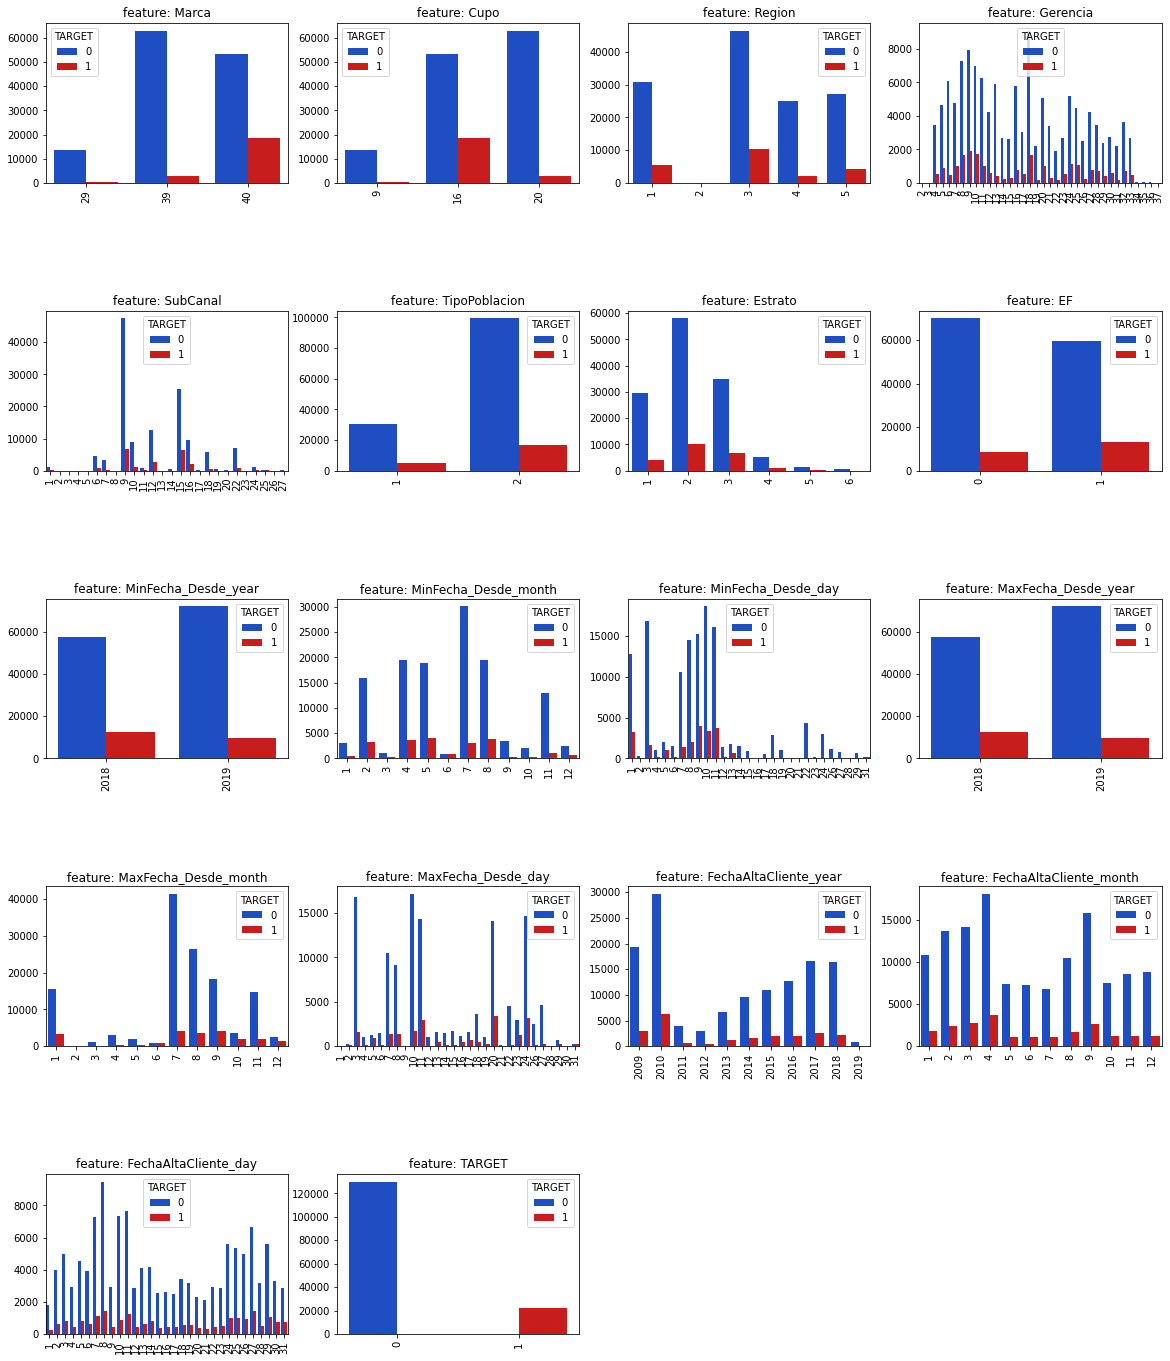

In [70]:
#visualizacion variables categoricas
import matplotlib.gridspec as gridspec
import seaborn as sns

###features = DataTrain.drop(['Cliente','Fecha_Desde','Fecha_Hasta','Cliente','FechaAltaCliente'],axis=1).columns
features=['Marca', 'Cupo','Region', 'Gerencia', 'SubCanal', 'TipoPoblacion','Estrato', 'EF', 'MinFecha_Desde_year',
       'MinFecha_Desde_month', 'MinFecha_Desde_day', 'MaxFecha_Desde_year',
       'MaxFecha_Desde_month', 'MaxFecha_Desde_day', 'FechaAltaCliente_year',
       'FechaAltaCliente_month', 'FechaAltaCliente_day', 'TARGET' ]
plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])

    sns.countplot(data=DataTrain, x=f, hue='TARGET', order=np.sort(DataTrain[f].unique()), palette=sns.xkcd_palette(['blue','red']))
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

In [78]:
DataTrain.head(3)

,Cosecha,Cliente,Marca,Cupo,Total_Promociones,Prom_Duracion_dd,Total_Duracion_dd,Maxima_Duracion_dd,Minima_Duracion_dd,MinFecha_Desde,MaxFecha_Desde,Total_Promo_Ejecutadas,Prom_Duracion_Ejecutadas_dd,Total_Duracion_Ejecutadas_dd,Maxima_Duracion_Ejecutadas_dd,Minima_Duracion_Ejecutadas_dd,MinFecha_Ejecutadas_Desde,MaxFecha_Ejecutadas_Desde,Total_Promociones_Prev,Prom_Duracion_dd_Prev,Total_Duracion_dd_Prev,Maxima_Duracion_dd_Prev,Minima_Duracion_dd_Prev,MinFecha_Desde_Prev,MaxFecha_Desde_Prev,Total_Promo_Ejecutadas_Prev,Prom_Duracion_Ejecutadas_dd_Prev,Total_Duracion_Ejecutadas_dd_Prev,Maxima_Duracion_Ejecutadas_dd_Prev,Minima_Duracion_Ejecutadas_dd_Prev,MinFecha_Ejecutadas_Desde_Prev,MaxFecha_Ejecutadas_Desde_Prev,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Antiguedad_Cliente_dd,NroVecesCompra,Total_Net_Revenue,Total_Net_Volumen,Total_Dcto,Max_Net_Revenue,Max_Net_Volumen,Max_Dcto,Min_Net_Revenue,Min_Net_Volumen,Min_Dcto,Total_Net_Revenue_Clase_Envase_1,Total_Net_Volumen_Clase_Envase_1,Total_Net_Dscto_Clase_Envase_1,Total_Net_Revenue_Clase_Envase_2,Total_Net_Volumen_Clase_Envase_2,Total_Net_Dscto_Clase_Envase_2,Total_Net_Revenue_Clase_Envase_3,Total_Net_Volumen_Clase_Envase_3,Total_Net_Dscto_Clase_Envase_3,Total_Net_Revenue_Clase_SegmentoPrecio_1,Total_Net_Volumen_Clase_SegmentoPrecio_1,Total_Net_Dscto_Clase_SegmentoPrecio_1,Total_Net_Revenue_Clase_SegmentoPrecio_2,Total_Net_Volumen_Clase_SegmentoPrecio_2,Total_Net_Dscto_Clase_SegmentoPrecio_2,Total_Net_Revenue_Clase_SegmentoPrecio_3,Total_Net_Volumen_Clase_SegmentoPrecio_3,Total_Net_Dscto_Clase_SegmentoPrecio_3,Total_Net_Revenue_Clase_SegmentoPrecio_4,Total_Net_Volumen_Clase_SegmentoPrecio_4,Total_Net_Dscto_Clase_SegmentoPrecio_4,UltimoAñoMesVenta,Ultimo_Total_Net_Revenue,Ultimo_Total_Net_Volumen,Ultimo_Total_Dcto,Ultimo_Total_Net_Revenue_Clase_Envase_1,Ultimo_Total_Net_Volumen_Clase_Envase_1,Ultimo_Total_Net_Dscto_Clase_Envase_1,Ultimo_Total_Net_Revenue_Clase_Envase_2,Ultimo_Total_Net_Volumen_Clase_Envase_2,Ultimo_Total_Net_Dscto_Clase_Envase_2,Ultimo_Total_Net_Revenue_Clase_Envase_3,Ultimo_Total_Net_Volumen_Clase_Envase_3,Ultimo_Total_Net_Dscto_Clase_Envase_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_1,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_2,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_3,Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_4,Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_4,TARGET,MinFecha_Desde_year,MinFecha_Desde_month,MinFecha_Desde_day,MaxFecha_Desde_year,MaxFecha_Desde_month,MaxFecha_Desde_day,FechaAltaCliente_year,FechaAltaCliente_month,FechaAltaCliente_day,MinFecha_Ejecutadas_Desde_year,MinFecha_Ejecutadas_Desde_month,MinFecha_Ejecutadas_Desde_day,MaxFecha_Ejecutadas_Desde_year,MaxFecha_Ejecutadas_Desde_month,MaxFecha_Ejecutadas_Desde_day,MinFecha_Desde_Prev_year,MinFecha_Desde_Prev_month,MinFecha_Desde_Prev_day,MaxFecha_Desde_Prev_year,MaxFecha_Desde_Prev_month,MaxFecha_Desde_Prev_day,MaxFecha_Ejecutadas_Desde_Prev_year,MaxFecha_Ejecutadas_Desde_Prev_month,MaxFecha_Ejecutadas_Desde_Prev_day,MinFecha_Ejecutadas_Desde_Prev_year,MinFecha_Ejecutadas_Desde_Prev_month,MinFecha_Ejecutadas_Desde_Prev_day
0,201809,1000,40,16,5,6.8,34,10,2,2018-05-09,2018-09-20,3,7.0,22,10,0,2018-07-09 00:00:00,2018-09-17 00:00:00,2,3,5,3,2,2018-08-13 00:00:00,2018-08-29 00:00:00,1,3,3,3,0,2018-08-13 00:00:00,2018-08-13 00:00:00,2009-09-14,5,17,15,1,2,1,3293,8.0,952758.87,3.14,-48227.28,239027.08,0.77,0.0,57297.46,0.18,-23379.73,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,952758.87,3.14,-48227.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201808.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13163.0,0.0,0.0,0.0,157878.0,1.0,-13

In [87]:
####Separamos en X y Y

X=DataTrain.loc[:,['Cliente','Marca','Cupo','Total_Promociones','Prom_Duracion_dd','Total_Duracion_dd','Maxima_Duracion_dd','Minima_Duracion_dd','Total_Promo_Ejecutadas','Prom_Duracion_Ejecutadas_dd','Total_Duracion_Ejecutadas_dd','Maxima_Duracion_Ejecutadas_dd','Minima_Duracion_Ejecutadas_dd','Total_Promociones_Prev','Prom_Duracion_dd_Prev','Total_Duracion_dd_Prev','Maxima_Duracion_dd_Prev','Minima_Duracion_dd_Prev','Total_Promo_Ejecutadas_Prev','Prom_Duracion_Ejecutadas_dd_Prev','Total_Duracion_Ejecutadas_dd_Prev','Maxima_Duracion_Ejecutadas_dd_Prev','Minima_Duracion_Ejecutadas_dd_Prev','Region','Gerencia','SubCanal','TipoPoblacion','Estrato','EF','Antiguedad_Cliente_dd','NroVecesCompra','Total_Net_Revenue','Total_Net_Volumen','Total_Dcto','Max_Net_Revenue','Max_Net_Volumen','Max_Dcto','Min_Net_Revenue','Min_Net_Volumen','Min_Dcto','Total_Net_Revenue_Clase_Envase_1','Total_Net_Volumen_Clase_Envase_1','Total_Net_Dscto_Clase_Envase_1','Total_Net_Revenue_Clase_Envase_2','Total_Net_Volumen_Clase_Envase_2','Total_Net_Dscto_Clase_Envase_2','Total_Net_Revenue_Clase_Envase_3','Total_Net_Volumen_Clase_Envase_3','Total_Net_Dscto_Clase_Envase_3','Total_Net_Revenue_Clase_SegmentoPrecio_1','Total_Net_Volumen_Clase_SegmentoPrecio_1','Total_Net_Dscto_Clase_SegmentoPrecio_1','Total_Net_Revenue_Clase_SegmentoPrecio_2','Total_Net_Volumen_Clase_SegmentoPrecio_2','Total_Net_Dscto_Clase_SegmentoPrecio_2','Total_Net_Revenue_Clase_SegmentoPrecio_3','Total_Net_Volumen_Clase_SegmentoPrecio_3','Total_Net_Dscto_Clase_SegmentoPrecio_3','Total_Net_Revenue_Clase_SegmentoPrecio_4','Total_Net_Volumen_Clase_SegmentoPrecio_4','Total_Net_Dscto_Clase_SegmentoPrecio_4','UltimoAñoMesVenta','Ultimo_Total_Net_Revenue','Ultimo_Total_Net_Volumen','Ultimo_Total_Dcto','Ultimo_Total_Net_Revenue_Clase_Envase_1','Ultimo_Total_Net_Volumen_Clase_Envase_1','Ultimo_Total_Net_Dscto_Clase_Envase_1','Ultimo_Total_Net_Revenue_Clase_Envase_2','Ultimo_Total_Net_Volumen_Clase_Envase_2','Ultimo_Total_Net_Dscto_Clase_Envase_2','Ultimo_Total_Net_Revenue_Clase_Envase_3','Ultimo_Total_Net_Volumen_Clase_Envase_3','Ultimo_Total_Net_Dscto_Clase_Envase_3','Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_1','Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_1','Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_1','Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_2','Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_2','Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_2','Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_3','Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_3','Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_3','Ultimo_Total_Net_Revenue_Clase_SegmentoPrecio_4','Ultimo_Total_Net_Volumen_Clase_SegmentoPrecio_4','Ultimo_Total_Net_Dscto_Clase_SegmentoPrecio_4','MinFecha_Desde_year','MinFecha_Desde_month','MinFecha_Desde_day','MaxFecha_Desde_year','MaxFecha_Desde_month','MaxFecha_Desde_day','FechaAltaCliente_year','FechaAltaCliente_month','FechaAltaCliente_day','MinFecha_Ejecutadas_Desde_year','MinFecha_Ejecutadas_Desde_month','MinFecha_Ejecutadas_Desde_day','MaxFecha_Ejecutadas_Desde_year','MaxFecha_Ejecutadas_Desde_month','MaxFecha_Ejecutadas_Desde_day','MinFecha_Desde_Prev_year','MinFecha_Desde_Prev_month','MinFecha_Desde_Prev_day','MaxFecha_Desde_Prev_year','MaxFecha_Desde_Prev_month','MaxFecha_Desde_Prev_day','MaxFecha_Ejecutadas_Desde_Prev_year','MaxFecha_Ejecutadas_Desde_Prev_month','MaxFecha_Ejecutadas_Desde_Prev_day','MinFecha_Ejecutadas_Desde_Prev_year','MinFecha_Ejecutadas_Desde_Prev_month','MinFecha_Ejecutadas_Desde_Prev_day']]

y=DataTrain.loc[:,['TARGET']]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # (X,y,%test,estratificacion)
                                                    y, 
                                                    test_size=0.30,
                                                    stratify=DataTrain['TARGET'], ###Dado que la base esta desvalanceada
                                                    random_state=100)

In [89]:
########################################
# Selección de Variables
########################################

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [90]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
importances = forest.feature_importances_     

In [92]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,MaxFecha_Ejecutadas_Desde_day,1.179008e-01
1,Total_Promo_Ejecutadas,1.141586e-01
2,MinFecha_Ejecutadas_Desde_month,1.105171e-01
3,MaxFecha_Ejecutadas_Desde_year,8.755043e-02
4,MinFecha_Ejecutadas_Desde_day,8.677611e-02
5,MinFecha_Ejecutadas_Desde_year,8.391575e-02
6,Maxima_Duracion_Ejecutadas_dd,8.267007e-02
7,Total_Duracion_Ejecutadas_dd,7.965066e-02
8,Prom_Duracion_Ejecutadas_dd,6.943586e-02
9,MaxFecha_Ejecutadas_Desde_month,5.996871e-02


In [93]:
########################################
# Modelamiento de los datos
########################################

## Modelos Supervisados : Regresión Logística Binaria ##

# Paso N°01: Llamar un algoritmo predictivos
from sklearn.linear_model import LogisticRegression

RegLog = LogisticRegression() # Paso N°02: Configuro el algoritmo
RegLog.fit(X_train, y_train)  # Paso N°03: Entreno o ajusto el algoritmo predictivo a los datos




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=RegLog.predict(X_train) # Prediccion sobre el train
y_pred_test= RegLog.predict(X_test) # Prediccion sobre el test

In [96]:
roc_auc_score(y_test, y_pred_test)

0.6119735497381082

In [97]:
roc_auc_score(y_train, y_pred_train)

0.6095397354249333

In [98]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[86757  4127]
 [11371  4089]]
Matriz confusion: Test
[[37191  1760]
 [ 4842  1783]]
Accuracy: Train
0.8542654028436019
Accuracy: Test
0.8551430577496928
Precision: Train
0.49768743914313535
Precision: Test
0.5032458368614169
Recall: Train
0.2644890038809832
Recall: Test
0.2691320754716981


**Optimizacion Modelo**


In [99]:
#### 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [100]:
def gridSerachModels(model,param,X_train,y_train):
    clf_model = RandomizedSearchCV(model,param_distributions=param,scoring="roc_auc",cv=10,n_jobs=-1,return_train_score=True)
    # Fit will test all of the combinations
    clf_model.fit(X_train,y_train)
    # Best estimator and best parameters
    print("-----------------------------------------------------------------------")
    print("Los parametros optimizados son: ", clf_model.best_params_)
    print("-----------------------------------------------------------------------")
    print("El accuracy en el entrenamiento es: ", clf_model.best_score_)
    return clf_model



In [ ]:
#,'reg_alpha':[i for i in range(2,12,2)]
param = {'max_depth':range(1,6),'n_estimators':range(100,2600,100),'learning_rate':[i/100 for i in range(3,33,3)]}
clf_xgb = gridSerachModels(LGBMClassifier(),param,X_train,y_train)

**Modelo Final Optimizado**

In [ ]:
Los parametros optimizados son:  {'n_estimators': 1600, 'max_depth': 1, 'learning_rate': 0.3}

In [124]:
clf_model = LGBMClassifier(n_estimators=1600,learning_rate=0.27,max_depth=1)
clf_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.27, max_depth=1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1600, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Prediccion sobre Test**

In [125]:
y_test_prob = clf_model.predict_proba(X_test)[:,1]
y_test_pred = np.array([1 if ele >= 0.5 else 0 for ele in y_test_prob])

In [126]:
from sklearn.metrics import classification_report

# Metricas en general
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7577
           1       1.00      1.00      1.00      2507

    accuracy                           1.00     10084
   macro avg       1.00      1.00      1.00     10084
weighted avg       1.00      1.00      1.00     10084



In [128]:
roc_auc_score(y_test, y_test_pred)

1.0

In [129]:
import lightgbm

In [130]:
train_data_lgbm = lightgbm.Dataset(X_train, label=y_train)
valid_data_lgbm = lightgbm.Dataset(X_test, label=y_test)

parameters = {
    'boosting_type': 'gbdt',
          'max_depth' : 4,
          'objective': 'binary',
          'nthread': 4, 
          'num_leaves': 256, 
          'learning_rate': 0.02,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.7,
          'reg_alpha': 9,
          'reg_lambda': 11,
          'min_split_gain': 0.1,
          'min_child_weight': 1,
          'min_child_samples': 6,
          'scale_pos_weight': 1,
          'feature_fraction': 0.8,
          'bagging_fraction': 0.8,
          'num_class' : 1,
          'metric' : 'auc',    
          'is_unbalance' : True}

model = lightgbm.train(parameters,
                       train_data_lgbm,
                       valid_sets=valid_data_lgbm,
                       num_boost_round=2000,
                       early_stopping_rounds=50
                      )

[1]	valid_0's auc: 1
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 1
[3]	valid_0's auc: 1
[4]	valid_0's auc: 1
[5]	valid_0's auc: 1
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
[12]	valid_0's auc: 1
[13]	valid_0's auc: 1
[14]	valid_0's auc: 1
[15]	valid_0's auc: 1
[16]	valid_0's auc: 1
[17]	valid_0's auc: 1
[18]	valid_0's auc: 1
[19]	valid_0's auc: 1
[20]	valid_0's auc: 1
[21]	valid_0's auc: 1
[22]	valid_0's auc: 1
[23]	valid_0's auc: 1
[24]	valid_0's auc: 1
[25]	valid_0's auc: 1
[26]	valid_0's auc: 1
[27]	valid_0's auc: 1
[28]	valid_0's auc: 1
[29]	valid_0's auc: 1
[30]	valid_0's auc: 1
[31]	valid_0's auc: 1
[32]	valid_0's auc: 1
[33]	valid_0's auc: 1
[34]	valid_0's auc: 1
[35]	valid_0's auc: 1
[36]	valid_0's auc: 1
[37]	valid_0's auc: 1
[38]	valid_0's auc: 1
[39]	valid_0's auc: 1
[40]	valid_0's auc: 1
[41]	valid_0's auc: 1
[42]	valid_0's auc: 1
[43]	valid_0's auc: 1
[

In [131]:

# Importamos la librería necesaria para el algoritmo
import xgboost as xgb

In [133]:

# En Xgboost necesitamos convertir nuestras matrices a matriz XGboost
# Uso eficiente de la memoria y entrenamiento rápido
dtrain = xgb.DMatrix(data=X_train,label =  y_train)
dtest  = xgb.DMatrix(data= X_test,label =  y_test)

In [135]:
len(X_train)

23529

In [136]:
len(X_test)

10084

In [134]:
# Eligiendo los parámetros para XGBoost
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.0001,
    "max_depth": 3,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 250 # Numero de arboles
# Aqui entrenamos el algoritmo
watch_list  = [(dtrain,'train'),(dtest,'test')]
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Aca se guarda el algoritmo

[0]	train-auc:1	test-auc:1
[1]	train-auc:1	test-auc:1
[2]	train-auc:1	test-auc:1
[3]	train-auc:1	test-auc:1
[4]	train-auc:1	test-auc:1
[5]	train-auc:1	test-auc:1
[6]	train-auc:1	test-auc:1
[7]	train-auc:1	test-auc:1
[8]	train-auc:1	test-auc:1
[9]	train-auc:1	test-auc:1
[10]	train-auc:1	test-auc:1
[11]	train-auc:1	test-auc:1
[12]	train-auc:1	test-auc:1
[13]	train-auc:1	test-auc:1
[14]	train-auc:1	test-auc:1
[15]	train-auc:1	test-auc:1
[16]	train-auc:1	test-auc:1
[17]	train-auc:1	test-auc:1
[18]	train-auc:1	test-auc:1
[19]	train-auc:1	test-auc:1
[20]	train-auc:1	test-auc:1
[21]	train-auc:1	test-auc:1
[22]	train-auc:1	test-auc:1
[23]	train-auc:1	test-auc:1
[24]	train-auc:1	test-auc:1
[25]	train-auc:1	test-auc:1
[26]	train-auc:1	test-auc:1
[27]	train-auc:1	test-auc:1
[28]	train-auc:1	test-auc:1
[29]	train-auc:1	test-auc:1
[30]	train-auc:1	test-auc:1
[31]	train-auc:1	test-auc:1
[32]	train-auc:1	test-auc:1
[33]	train-auc:1	test-auc:1
[34]	train-auc:1	test-auc:1
[35]	train-auc:1	test-auc:1
[3

In [ ]:
DataTrain.head(3)

## En Produccion


In [ ]:
del DataTest['Target']

In [ ]:
del test['Ejecuto_Promo']

In [ ]:
DataTest.head(3)

In [ ]:
test.head(3)

In [ ]:
result = pd.merge(test, DataTest, how='left', on=['Cliente', 'Marca','Cupo'])

In [ ]:
result.head(30)

In [ ]:
result.Region.coun

In [ ]:
result.groupby('Region')['Cliente'].count()

In [ ]:
result.isna().sum()

In [ ]:
len(result)